<a href="https://colab.research.google.com/github/Bigyajeet/CTTC_AIML_INTERN_HUB/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random
!pip install np_utils
np.random.seed(0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=71690ee37d268c0244b19b91628232c476b5fa2fd47cd5cc92995f8121d052e0
  Stored in directory: /root/.cache/pip/wheels/19/0d/33/eaa4dcda5799bcbb51733c0744970d10edb4b9add4f41beb43
Successfully built np_utils


In [ ]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)
60000


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

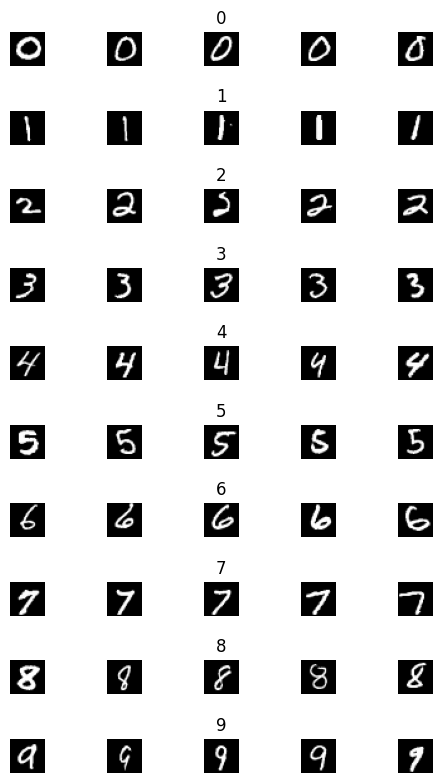

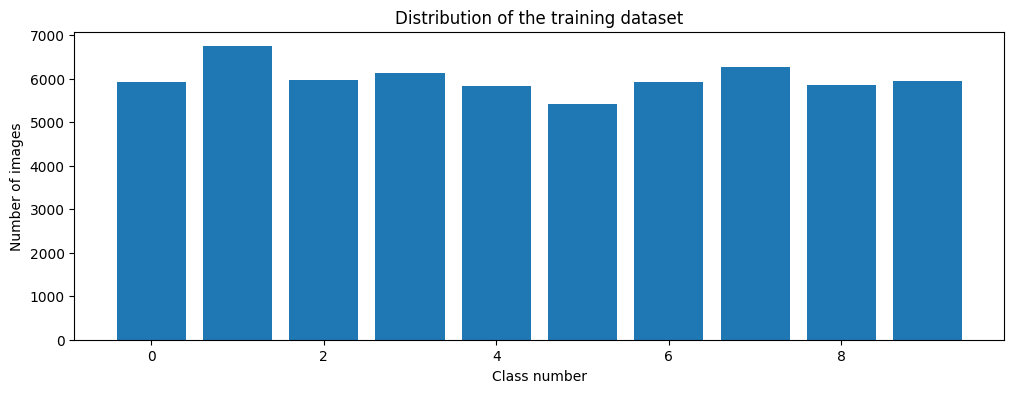

In [ ]:
num_of_samples=[]
cols=5
num_classes=10

fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,8))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected=X_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:],
                     cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      # The following line was moved outside the inner loop
      # num_of_samples.append(len(x_selected))

# Moved outside the inner loop to ensure num_of_samples is fully populated
for j in range(num_classes):
    x_selected = X_train[y_train == j]
    num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)#10 categorize


In [ ]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten


In [ ]:
def Lenet_model():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(Conv2D(30,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(200,activation='relu'))
  model.add(Dense(100,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model=Lenet_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 30)     │        22,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 15)       │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        48,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,685 (377.68 KB)

 Trainable params: 96,685 (377.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=20,
                  batch_size=400,verbose=1,shuffle=1)

Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 84s 613ms/step - accuracy: 0.6582 - loss: 1.0121 - val_accuracy: 0.9740 - val_loss: 0.0872
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 137s 573ms/step - accuracy: 0.9699 - loss: 0.0935 - val_accuracy: 0.9795 - val_loss: 0.0710
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 78s 575ms/step - accuracy: 0.9806 - loss: 0.0624 - val_accuracy: 0.9802 - val_loss: 0.0692
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 83s 585ms/step - accuracy: 0.9837 - loss: 0.0540 - val_accuracy: 0.9860 - val_loss: 0.0467
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 82s 586ms/step - accuracy: 0.9864 - loss: 0.0436 - val_accuracy: 0.9847 - val_loss: 0.0497
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 83s 591ms/step - accuracy: 0.9892 - loss: 0.0366 - val_accuracy: 0.9862 - val_loss: 0.0476
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 78s 578ms/step - accuracy: 0.9878 - loss: 0.0393 - val_accuracy: 0.9868 - val_loss: 0.0508
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 81s 574ms/step - accuracy: 0.9879 - loss: 

Text(0.5, 0, 'epoch')

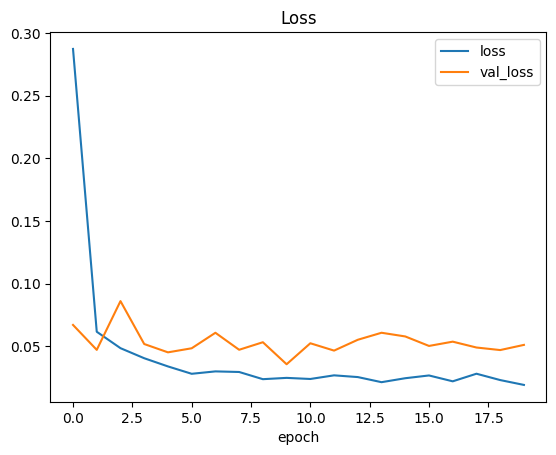

In [ ]:
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.legend(['loss','val_loss'])
      plt.title('Loss')
      plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

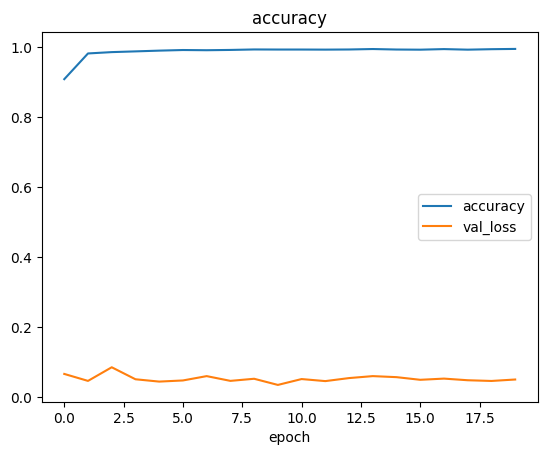

In [ ]:
      plt.plot(history.history['accuracy'])
      plt.plot(history.history['val_loss'])
      plt.legend(['accuracy','val_loss'])
      plt.title('accuracy')
      plt.xlabel('epoch')

In [ ]:
from google.colab import files
upload=files.upload()

Saving mnist_5.png to mnist_5.png


In [ ]:
d=list(upload.keys())[0]
print(d)

mnist_5.png


[137  80  78 ...  66  96 130]


/tmp/ipython-input-16-1491704237.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


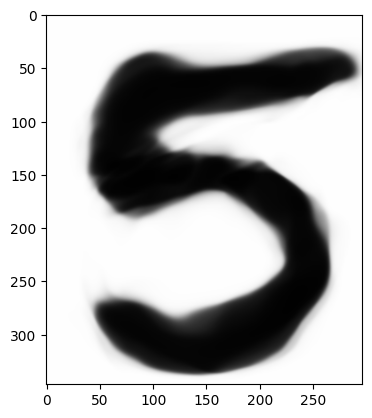

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

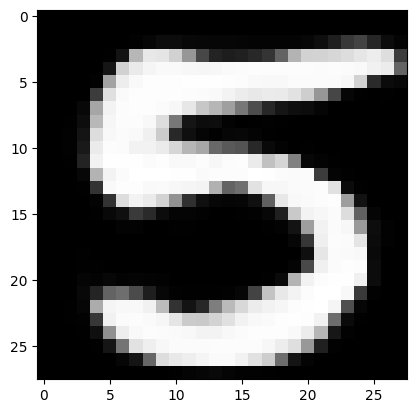

In [ ]:
img=cv2.resize(img,(28,28))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.bitwise_not(img)
plt.imshow(img,cmap=plt.get_cmap("gray"))
plt.show()

In [ ]:
img=img/255
img=img.reshape(1,28,28,1)
prediction=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [19]:
print(prediction)

[[3.3878407e-09 5.4557657e-17 2.1907198e-20 4.0990375e-07 5.9943384e-18
  9.9999964e-01 3.5153716e-10 3.4223430e-11 4.5387973e-12 2.1612083e-08]]


In [20]:
p=np.argmax(prediction,axis=1)
p

array([5])